In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame 

print(df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [2]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('MEDV', axis=1))
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def knn_regression_predict(X_train, y_train, x_test, k=5):
    distances = np.linalg.norm(X_train - x_test, axis=1)
    k_indices = distances.argsort()[:k]
    k_values = y_train[k_indices]
    return np.mean(k_values)  

In [ ]:
k = 5
y_pred = np.array([knn_regression_predict(X_train, y_train, x, k) for x in X_test])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN Regression (k={k})")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-sq. Score: {r2:.4f}")

KNN Regression (k=5)
Mean Squared Error: 21.6493
R-sq. Score: 0.7048


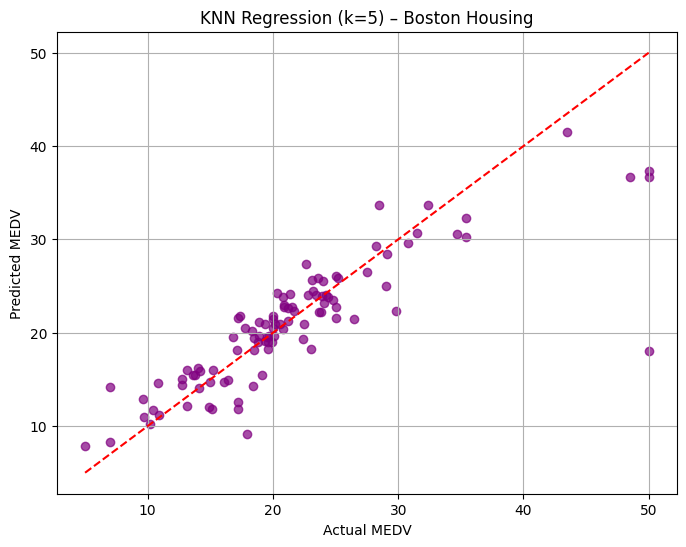

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title(f"KNN Regression (k={k}) – Boston Housing")
plt.grid(True)
plt.show()